<a href="https://colab.research.google.com/github/ErikRidhoFirm/Pembelajaran-Mesin_Ganjil_2025/blob/main/Kuis_Pembelajaran_Mesin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload() # upload dataset

file_name = list(uploaded.keys())[0]
df = pd.read_excel(uploaded[file_name])

# Tampilkan 5 data awal
display(df.head())

Saving Dataset Kuis1.xlsx to Dataset Kuis1 (4).xlsx


/tmp/ipython-input-2650877238.py:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df = pd.read_excel(uploaded[file_name])


,Unnamed: 0,Timestamp,Nama lengkap,Jenis kelamin,Kota asal,Tinggi badan (cm),Asal kelas,Target IPS semester ini,Warna kesukaan,Film favorit,Hobi,Genre musik,Idola,Kota favorit,Negara yang ingin di kunjungi,Makanan favorit,Minuman favorit
0,0,2025-08-27 14:50:02.363,Satria Piningit,Lanang,Kabupaten Malang,165,2C,3.78,Biru,Semua dengan genre horror,Menyanyi,Pop,Lyodra,Kota Malang,Mekkah,Dimsum,Caramel Macchiato
1,1,2025-08-27 14:54:04.721,Jaka Tingkir,Lanang,Kediri,170,TI 2A,3.40,Biru,Spiderman,Bola,Pop,Lionel Messi,Kediri,Jepang,Ayam geprek,Es teh
2,2,2025-08-27 14:54:07.690,Arya Kamandanu,Lanang,Gresik,174,3D,3.50,hitam,Naruto,Futsal,Pop,Ronaldo,Surabaya,Amerika Serikat,Seblak,Es Teh
3,3,2025-08-27 14:54:43.583,Dewi Arimbi,Wadon,Kota Malang,150,2G,3.95,Biru,Taxi Driver,Drawing,RnB,Ariana,Malang,Thailand,Mie ayam,Kopi
4,4,2025-08-27 14:54:57.617,Gundala Si Putra Petir,Lanang,bojonegoro,170,2B,4.00,ABANG,jumbo,badminton,pop,DEANKT,dieng,"inggris,manchester",mie ayam,air mineral


**SOAL 1**

Hitung rata rata tinggi badan mahasiswa yang asal kotanya sama dengan kamu.

* bersihkan data asal kota dulu, jika ada data yang berisi "kota madiun", "kabupaten malang" bersihkan hingga hanya menjadi "madiun" dan "malang"

In [ ]:
# Bersihkan nama kota: hilangkan "kota" / "kabupaten" di depan
data["Kota asal bersih"] = (
    data["Kota asal"]
    .str.lower()
    .str.replace("kota ", "", regex=False)
    .str.replace("kabupaten ", "", regex=False)
    .str.strip()
)

# Hitung rata-rata tinggi badan per kota
rata_per_kota = data.groupby("Kota asal bersih")["Tinggi badan (cm)"].mean().reset_index()

print("Rata-rata tinggi badan per kota:")
print(rata_per_kota)

Rata-rata tinggi badan per kota:
  Kota asal bersih  Tinggi badan (cm)
0       bojonegoro              170.0
1           gresik              174.0
2           kediri              170.0
3           malang              157.5


* Bandingkan tinggi badanmu dengan rata-rata kota asal.

In [ ]:
# Bersihkan nama kota
data["Kota asal bersih"] = (
    data["Kota asal"]
    .str.lower()
    .str.replace("kota ", "", regex=False)
    .str.replace("kabupaten ", "", regex=False)
    .str.strip()
)

# Hitung rata-rata tinggi badan per kota
rata_per_kota = data.groupby("Kota asal bersih")["Tinggi badan (cm)"].mean().reset_index()

# disini digunakan untuk membandingkan tinggi
tinggi_saya = 165
kota_saya = "malang"   # digunakan untuk mengetahui kota asal.

# Ambil rata-rata kota saya
rata_kota_saya = rata_per_kota.loc[
    rata_per_kota["Kota asal bersih"] == kota_saya, "Tinggi badan (cm)"
].values[0]

print(f"Tinggi badan saya: {tinggi_saya} cm")
print(f"Rata-rata tinggi badan mahasiswa asal {kota_saya}: {rata_kota_saya:.1f} cm")

# digunakan perkondisian untuk membandingkan tinggi badan, dengan rata rata kota asal.
if tinggi_saya > rata_kota_saya:
    print(f"Saya {tinggi_saya - rata_kota_saya:.1f} cm lebih tinggi dari rata-rata.")
elif tinggi_saya < rata_kota_saya:
    print(f"Saya {rata_kota_saya - tinggi_saya:.1f} cm lebih rendah dari rata-rata.")
else:
    print("Tinggi saya sama dengan rata-rata.")


Tinggi badan saya: 165 cm
Rata-rata tinggi badan mahasiswa asal malang: 157.5 cm
Saya 7.5 cm lebih tinggi dari rata-rata.


* Apakah kamu lebih tinggi atau lebih rendah dari rata-rata tersebut?

Jawab :
Berdasarkan dari hasil diatas, dapat disimpulkan bahwa lebih tinggi dengan hasil 7.5 cm dari rata-rata.

**SOAL 2**

Kolom Target IPS Semester ini memiliki formasi format (angka, teks, koma/titik)

* bersihkan kolom menjadi numerik

In [ ]:
# Membersihkan kolom Target IPS semester ini
data["Target IPS semester ini bersih"] = (
    data["Target IPS semester ini"]
    .astype(str)               # dipastikan string terlebih dahulu
    .str.replace(",", ".", regex=False)  # ganti koma dengan titik
    .str.extract(r"([\d\.]+)") # ambil hanya angka & titik
)

# Konversi ke numerik (float)
data["Target IPS semester ini bersih"] = pd.to_numeric(
    data["Target IPS semester ini bersih"], errors="coerce"
)

# Cek hasil
print(data[["Target IPS semester ini", "Target IPS semester ini bersih"]].head(10))


   Target IPS semester ini  Target IPS semester ini bersih
0                     3.78                            3.78
1                     3.40                            3.40
2                     3.50                            3.50
3                     3.95                            3.95
4                     4.00                            4.00
5                     4.00                            4.00


* Lakukan normalisasi Min-Max

In [ ]:
# Bersihkan kolom Target IPS semester ini
data["Target IPS bersih"] = (
    data["Target IPS semester ini"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.extract(r"([\d\.]+)")
)

# Konversi ke numerik
data["Target IPS bersih"] = pd.to_numeric(data["Target IPS bersih"], errors="coerce")

# Melakukan normalisasi min-max
min_val = data["Target IPS bersih"].min()
max_val = data["Target IPS bersih"].max()

data["Target IPS Normalisasi"] = (data["Target IPS bersih"] - min_val) / (max_val - min_val)

# Cek hasil
print(data[["Target IPS semester ini", "Target IPS bersih", "Target IPS Normalisasi"]].head(10))


   Target IPS semester ini  Target IPS bersih  Target IPS Normalisasi
0                     3.78               3.78                0.633333
1                     3.40               3.40                0.000000
2                     3.50               3.50                0.166667
3                     3.95               3.95                0.916667
4                     4.00               4.00                1.000000
5                     4.00               4.00                1.000000


* Berapa nilai normalisasi IPS target kamu sendiri?

In [ ]:
# Bersihkan kolom Target IPS
data["Target IPS bersih"] = (
    data["Target IPS semester ini"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.extract(r"([\d\.]+)")
)

data["Target IPS bersih"] = pd.to_numeric(data["Target IPS bersih"], errors="coerce")

# Hitung normalisasi min dan max
min_val = data["Target IPS bersih"].min()
max_val = data["Target IPS bersih"].max()

# Nilai target saya
target_saya = 3.65

# Normalisasi Min-Max
normalisasi_saya = (target_saya - min_val) / (max_val - min_val)

print(f"Target IPS saya: {target_saya}")
print(f"Nilai Min IPS: {min_val}, Nilai Max IPS: {max_val}")
print(f"Hasil normalisasi IPS saya: {normalisasi_saya:.2f}")


Target IPS saya: 3.65
Nilai Min IPS: 3.4, Nilai Max IPS: 4.0
Hasil normalisasi IPS saya: 0.42


**SOAL 3**

Lakukan Label Encoding pada kolom warna kesukaan

* Tampilkan hasil encoding warna kesukaanmu sendiri.

In [ ]:
from sklearn.preprocessing import LabelEncoder  # memasukkan import library untuk encoding

# Buat encoder
le = LabelEncoder()

# Terapkan encoding pada kolom warna kesukaan
data["Warna kesukaan encoded"] = le.fit_transform(data["Warna kesukaan"].astype(str).str.lower().str.strip())

# Tampilkan mapping warna -> angka
mapping_warna = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping Warna -> Label:")
print(mapping_warna)

# kode untuk meng-enkoding warna kesukaan saya
warna_saya = "biru"   # warna kesukaan saya
encoded_saya = mapping_warna[warna_saya]

print(f"\nWarna kesukaan saya: {warna_saya}")
print(f"Hasil encoding: {encoded_saya}")


Mapping Warna -> Label:
{'abang': np.int64(0), 'biru': np.int64(1), 'hitam': np.int64(2)}

Warna kesukaan saya: biru
Hasil encoding: 1


* Apakah warnamu termasuk kode terkecil, terbesar, atau ditengah?

Jawab :
dari percobaan diatas warna favorit saya termasuk kode yang berada di tengah yaitu 1.

**SOAL 4**

Kelompokkan data berdasarkan Jenis kelamin

* Hitung rata-rata tinggi badan tiap kelompok

In [ ]:
# Mengelompokkan berdasarkan jenis kelamin, hitung rata-rata tinggi badan
rata_tinggi_kelamin = data.groupby("Jenis kelamin")["Tinggi badan (cm)"].mean().reset_index()

# Menampilkan hasilnya
print("Rata-rata tinggi badan berdasarkan jenis kelamin:")
print(rata_tinggi_kelamin)


Rata-rata tinggi badan berdasarkan jenis kelamin:
  Jenis kelamin  Tinggi badan (cm)
0        Lanang             169.75
1         Wadon             160.00


* bandingkan tinggi badanmu dengan rata-rata kelompokmu

In [ ]:
# Menghitung rata-rata tinggi badan tiap kelompok berdasarkan jenis kelamin
rata_tinggi_kelamin = data.groupby("Jenis kelamin")["Tinggi badan (cm)"].mean().reset_index()
print("Rata-rata tinggi badan tiap kelompok:")
print(rata_tinggi_kelamin)

# memasukkan tinggi badan saya
tinggi_saya = 165         # tinggi badan
kelamin_saya = "Lanang"   # jenis kelamin

# Mengambil rata-rata sesuai dengan kelompok saya
rata_kelompok = rata_tinggi_kelamin.loc[
    rata_tinggi_kelamin["Jenis kelamin"] == kelamin_saya, "Tinggi badan (cm)"
].values[0]

# membandingkan tinggi badang saya dengan rata rata kelompok
print(f"\nTinggi badan saya: {tinggi_saya} cm")
print(f"Rata-rata tinggi badan kelompok {kelamin_saya}: {rata_kelompok:.2f} cm")

if tinggi_saya > rata_kelompok:
    print(f"Saya {tinggi_saya - rata_kelompok:.2f} cm lebih tinggi dari rata-rata kelompok.")
elif tinggi_saya < rata_kelompok:
    print(f"Saya {rata_kelompok - tinggi_saya:.2f} cm lebih rendah dari rata-rata kelompok.")
else:
    print("Tinggi saya sama dengan rata-rata kelompok.")


Rata-rata tinggi badan tiap kelompok:
  Jenis kelamin  Tinggi badan (cm)
0        Lanang             169.75
1         Wadon             160.00

Tinggi badan saya: 165 cm
Rata-rata tinggi badan kelompok Lanang: 169.75 cm
Saya 4.75 cm lebih rendah dari rata-rata kelompok.


**SOAL 5**

Buat bar chart distribusi Genre musik favorit.
* Dari grafik tersebut, apakah genre musik favoritmu termasuk dominan atau minoritas?

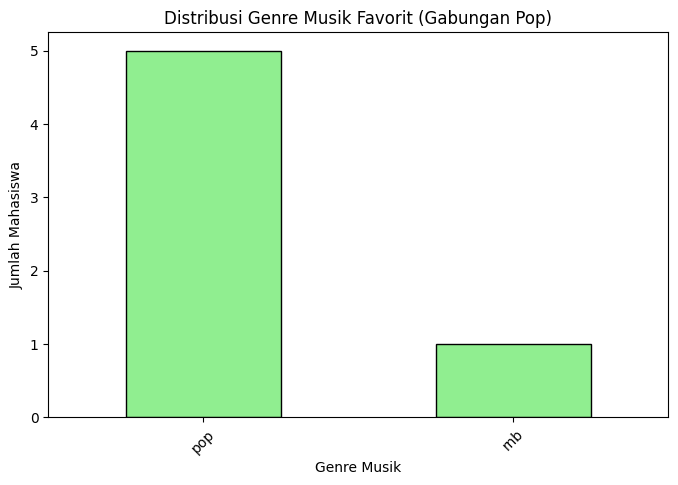

Genre musik favorit saya: pop (jumlah: 5)
Genre saya termasuk DOMINAN (paling banyak dipilih).


In [ ]:
import matplotlib.pyplot as plt   # memasukkan import library

# Membersihkan kolom Genre musik favorit
data["Genre musik"] = data["Genre musik"].str.lower().str.strip()

# Gabungkan semua variasi pop yang terpisah
data["Genre musik"] = data["Genre musik"].replace({
    "pop musik": "pop",
    "pop.": "pop",
    "pop ": "pop"
})

# Menghitung distribusi Genre musik favorit
genre_counts = data["Genre musik"].value_counts()

# Menggambarkan plot chart
plt.figure(figsize=(8,5))
genre_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Distribusi Genre Musik Favorit (Gabungan Pop)")
plt.xlabel("Genre Musik")
plt.ylabel("Jumlah Mahasiswa")
plt.xticks(rotation=45)
plt.show()

# Genre musik favorit saya
musik_saya = "pop"   # genre musik favorit

if musik_saya in genre_counts:
    jumlah_musik_saya = genre_counts[musik_saya]
    jumlah_terbanyak = genre_counts.max()
    jumlah_tersedikit = genre_counts.min()

    print(f"Genre musik favorit saya: {musik_saya} (jumlah: {jumlah_musik_saya})")

    if jumlah_musik_saya == jumlah_terbanyak:
        print("Genre saya termasuk DOMINAN (paling banyak dipilih).")
    elif jumlah_musik_saya == jumlah_tersedikit:
        print("Genre saya termasuk MINORITAS (paling sedikit dipilih).")
    else:
        print("Genre saya ada di tengah (tidak paling banyak, tidak paling sedikit).")
else:
    print(f"Genre musik favorit saya: {musik_saya} tidak ditemukan dalam data.")

dari pengerjaan diatas dapat dijelaskan bahwa genre favorit saya adalah pop, dan sudah dibuatkannya pula bar chart sesuai dengan gambar diatas, yang dimana genre favorit musik saya termasuk dominan, karna paling banyak.

**SOAL 6**

Gunakan metode IQR (Interquartile Range) untuk mendeteksi outlier tinggi badan.

In [ ]:
# mengambil kolom tinggi badan
tinggi = data["Tinggi badan (cm)"]

# dihitungnya Q1, Q3, dan IQR
Q1 = tinggi.quantile(0.25)
Q3 = tinggi.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah & batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Mencari data outlier
outliers = data[(tinggi < batas_bawah) | (tinggi > batas_atas)]

# menampilkan hasil
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("\nOutlier tinggi badan:")
print(outliers[["Nama lengkap", "Jenis kelamin", "Tinggi badan (cm)"]])

Q1: 166.25
Q3: 170.0
IQR: 3.75
Batas bawah: 160.625
Batas atas: 175.625

Outlier tinggi badan:
  Nama lengkap Jenis kelamin  Tinggi badan (cm)
3  Dewi Arimbi         Wadon                150


* Apakah tinggi badanmu termasuk outlier atau tidak?

jawab :
dari kode diatas dapat dijelaskan jika tinggi badan saya tidak termasuk outlier, mengapa demikian? bisa dikatakan outlier jika tinggi < Q1 - 1.5 x IQR atau tinggi Q3 > + 1.5 x IQR

**SOAL 7**

Bersihkan kolom asal kelas (hapus spasi berlebih, seragamkan huruf kapitalisasi)

In [ ]:
# Membersihkan kolom dari Asal kelas
data["Asal kelas"] = (
    data["Asal kelas"]
    .astype(str)                       # pastikan tipe string
    .str.strip()                       # hapus spasi di awal & akhir
    .str.replace(r"\s+", " ", regex=True)  # ganti spasi berlebih dengan 1 spasi
    .str.title()                       # menggunakan kapitalisasi
)
# Menampilkan hasilnya
print("Daftar asal kelas setelah dibersihkan:")
print(data["Asal kelas"].unique())


Daftar asal kelas setelah dibersihkan:
['2C' 'Ti 2A' '3D' '2G' '2B']


* Hitung jumlah mahasiswa per kelas

In [ ]:
# Membersihkan kolom dari Asal Kelas
data["Asal kelas"] = (
    data["Asal kelas"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()   # kapitalisasi untuk Kelas
)

# Menghitung jumlah mahasiswa dalam 1 kelas
jumlah_per_kelas = data["Asal kelas"].value_counts().reset_index()
jumlah_per_kelas.columns = ["Asal kelas", "Jumlah Mahasiswa"]

# tampilkan hasilnya
print(jumlah_per_kelas)


  Asal kelas  Jumlah Mahasiswa
0         2B                 2
1         2C                 1
2      Ti 2A                 1
3         3D                 1
4         2G                 1


* Apakah kamu termasuk di kellas dengan jumlah terbanyak, menengah, atau sedikit?

In [ ]:
# Membersihkan kolom yang ada pada Asal Kelas
data["Asal kelas"] = (
    data["Asal kelas"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

# Menghitung jumlah mahasiswa per kelas
jumlah_per_kelas = data["Asal kelas"].value_counts()

# menentukan kelas
kelas_saya = "Ti 2A"   # kelas saya, diubah menjadi "Ti 2A"
jumlah_saya = jumlah_per_kelas[kelas_saya]

# mencari jumlah terbanyak & tersedikit
jumlah_max = jumlah_per_kelas.max()
jumlah_min = jumlah_per_kelas.min()

# menentukan posisi kelas saya
if jumlah_saya == jumlah_max:
    status = "TERBANYAK"
elif jumlah_saya == jumlah_min:
    status = "TERSEDIKIT"
else:
    status = "MENENGAH"

print(f"Kelas saya: {kelas_saya} (jumlah: {jumlah_saya})")
print(f"Jumlah terbanyak: {jumlah_max}, Jumlah tersedikit: {jumlah_min}")
print(f"Kesimpulan: Kelas saya termasuk {status}")

Kelas saya: Ti 2A (jumlah: 1)
Jumlah terbanyak: 2, Jumlah tersedikit: 1
Kesimpulan: Kelas saya termasuk TERSEDIKIT
